<a href="https://colab.research.google.com/github/KolluriPriyanka/Alzheimer-s-Disease/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive');

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras import backend as k
from keras.applications import VGG16
from matplotlib import pyplot as plt

In [ ]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):

  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'categorical'
  )

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'categorical'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [ ]:
pathTrain  = '/content/drive/MyDrive/Alzheimer_s Dataset/test'
pathTest ='/content/drive/MyDrive/Alzheimer_s Dataset/test'

In [ ]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),8)

Found 1279 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [ ]:
base_model = VGG16(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
from keras import regularizers

In [ ]:
import tensorflow as tf

In [ ]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()


In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(input_shape=(224,224,3), include_top=False)

# Freeze the layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False



model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Add weight decay to the Dense layer
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # Add weight decay to the Dense layer
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

weight_decay = 0.001
# Compile the model
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay = weight_decay)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow import keras

Epoch 1/20
40/40 [==============================] - 434s 10s/step - loss: 5.0988 - accuracy: 0.4550 - val_loss: 3.2875 - val_accuracy: 0.4988
Epoch 2/20
40/40 [==============================] - 10s 250ms/step - loss: 2.9563 - accuracy: 0.4949 - val_loss: 2.5312 - val_accuracy: 0.5606
Epoch 3/20
40/40 [==============================] - 10s 256ms/step - loss: 2.3646 - accuracy: 0.5238 - val_loss: 2.1300 - val_accuracy: 0.5004
Epoch 4/20
40/40 [==============================] - 10s 253ms/step - loss: 2.0303 - accuracy: 0.5512 - val_loss: 1.9026 - val_accuracy: 0.5934
Epoch 5/20
40/40 [==============================] - 10s 254ms/step - loss: 1.8308 - accuracy: 0.5473 - val_loss: 1.7572 - val_accuracy: 0.5489
Epoch 6/20
40/40 [==============================] - 10s 254ms/step - loss: 1.6864 - accuracy: 0.5919 - val_loss: 1.5348 - val_accuracy: 0.6216
Epoch 7/20
40/40 [==============================] - 10s 255ms/step - loss: 1.5633 - accuracy: 0.6169 - val_loss: 1.5660 - val_accuracy: 0.7076


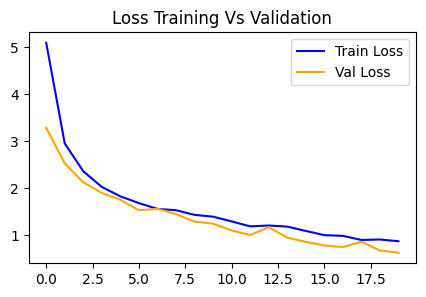

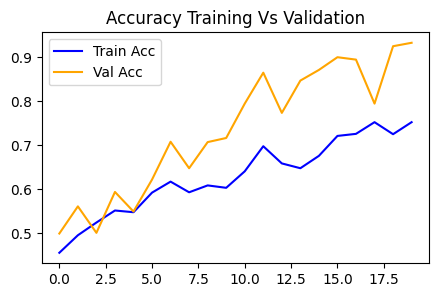

In [ ]:
history = model.fit(train_data,epochs=20,validation_data=test_data)
show_result(history)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [ ]:
model.evaluate(test_data)

40/40 [==============================] - 5s 128ms/step - loss: 0.6300 - accuracy: 0.9328


[0.6299640536308289, 0.9327599406242371]

In [ ]:
model.save('/content/drive/MyDrive/model.h5')